In [18]:
import numpy as np
import pandas as pd
import missingno as mn
import scipy.stats as ss
import seaborn as sns

from matplotlib import pyplot as plt

### load data

In [2]:
insurance_data = pd.read_csv('../../data/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### identify numerical and categorical variable

In [5]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
numerical_features = insurance_data.select_dtypes(include=np.number).columns
categorical_features = insurance_data.select_dtypes(include=np.object).columns

In [9]:
numerical_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

### quantify missing data

In [12]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 3600x1800 with 0 Axes>

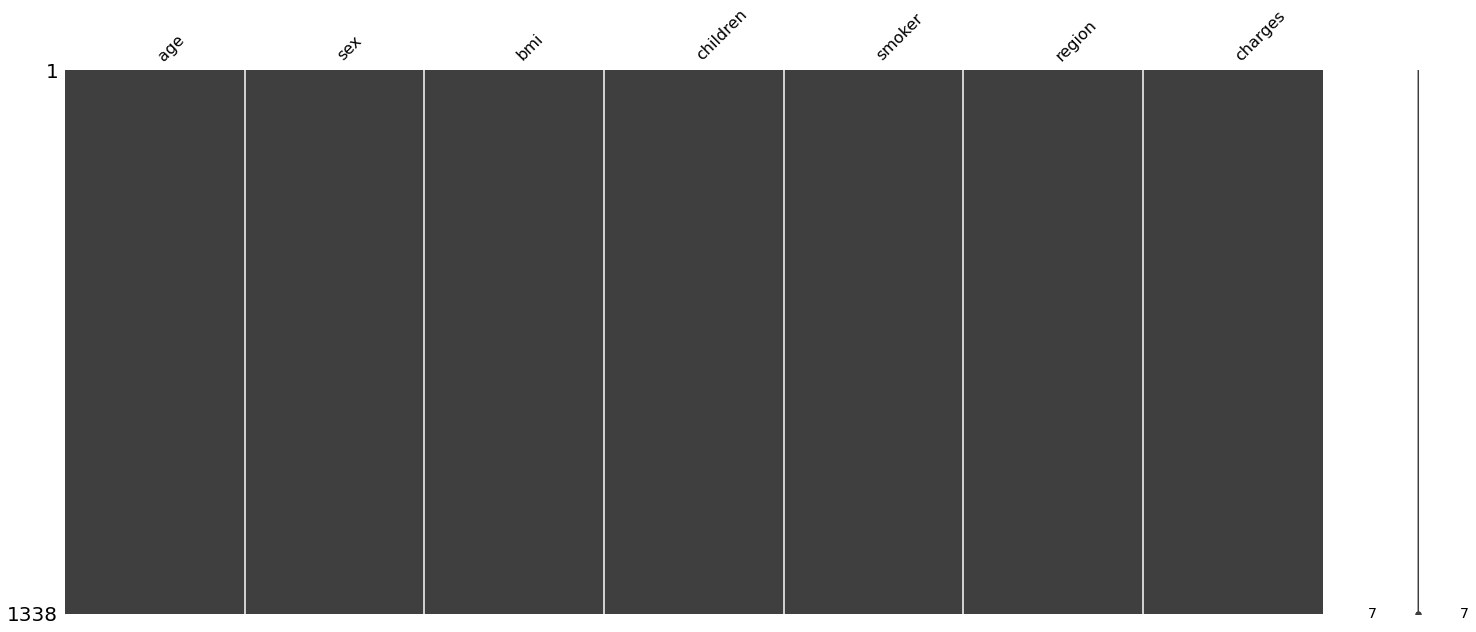

In [13]:
plt.figure(figsize=[12, 6], dpi=300)
mn.matrix(insurance_data)
plt.show()

### determine cardinalities in categorical features

In [15]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

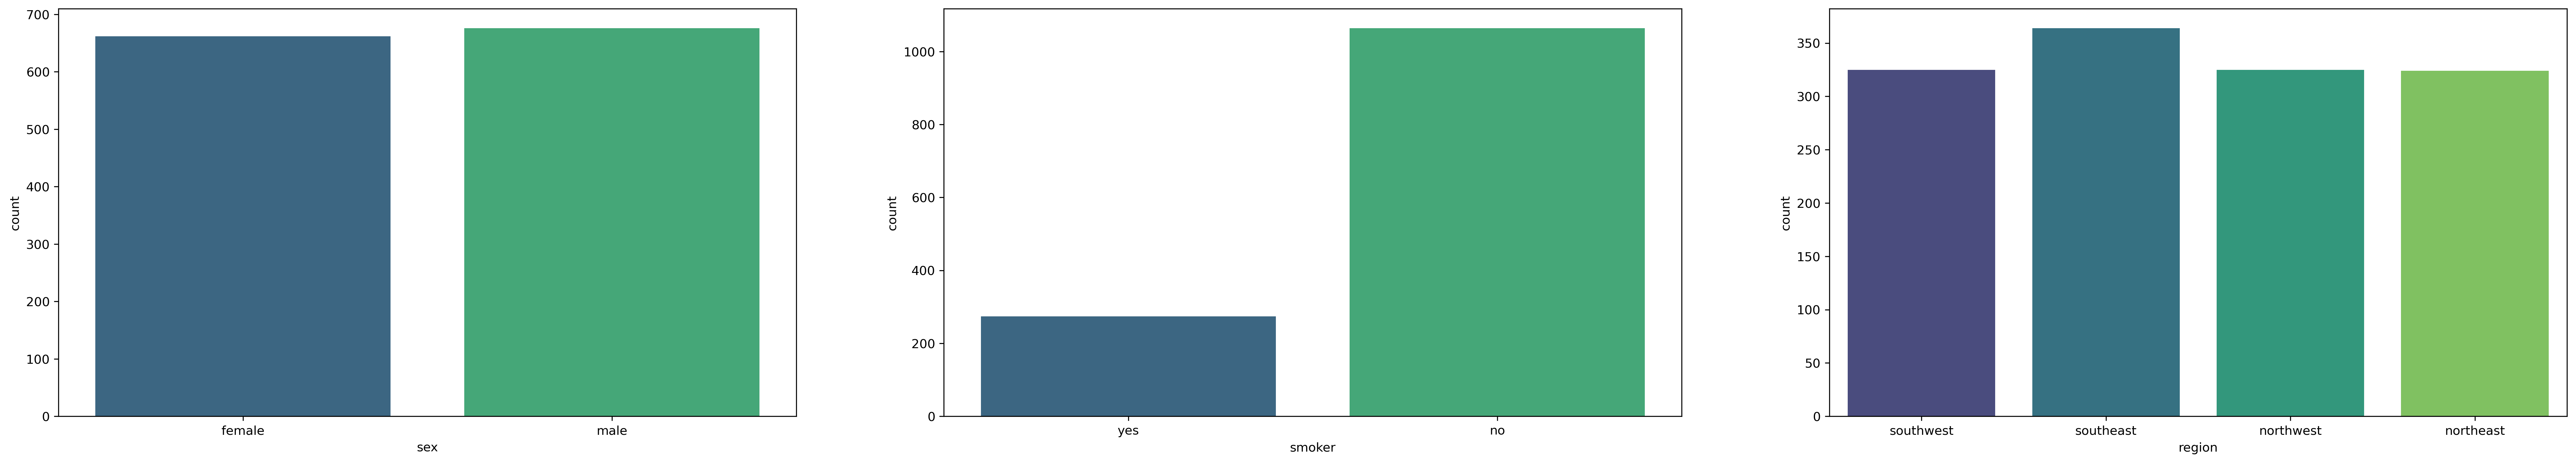

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[36, 6], dpi=300)

for i in range(len(axes)):
    sns.countplot(x=insurance_data[categorical_features[i]],
                  ax=axes[i],
                  palette='viridis')

plt.show()

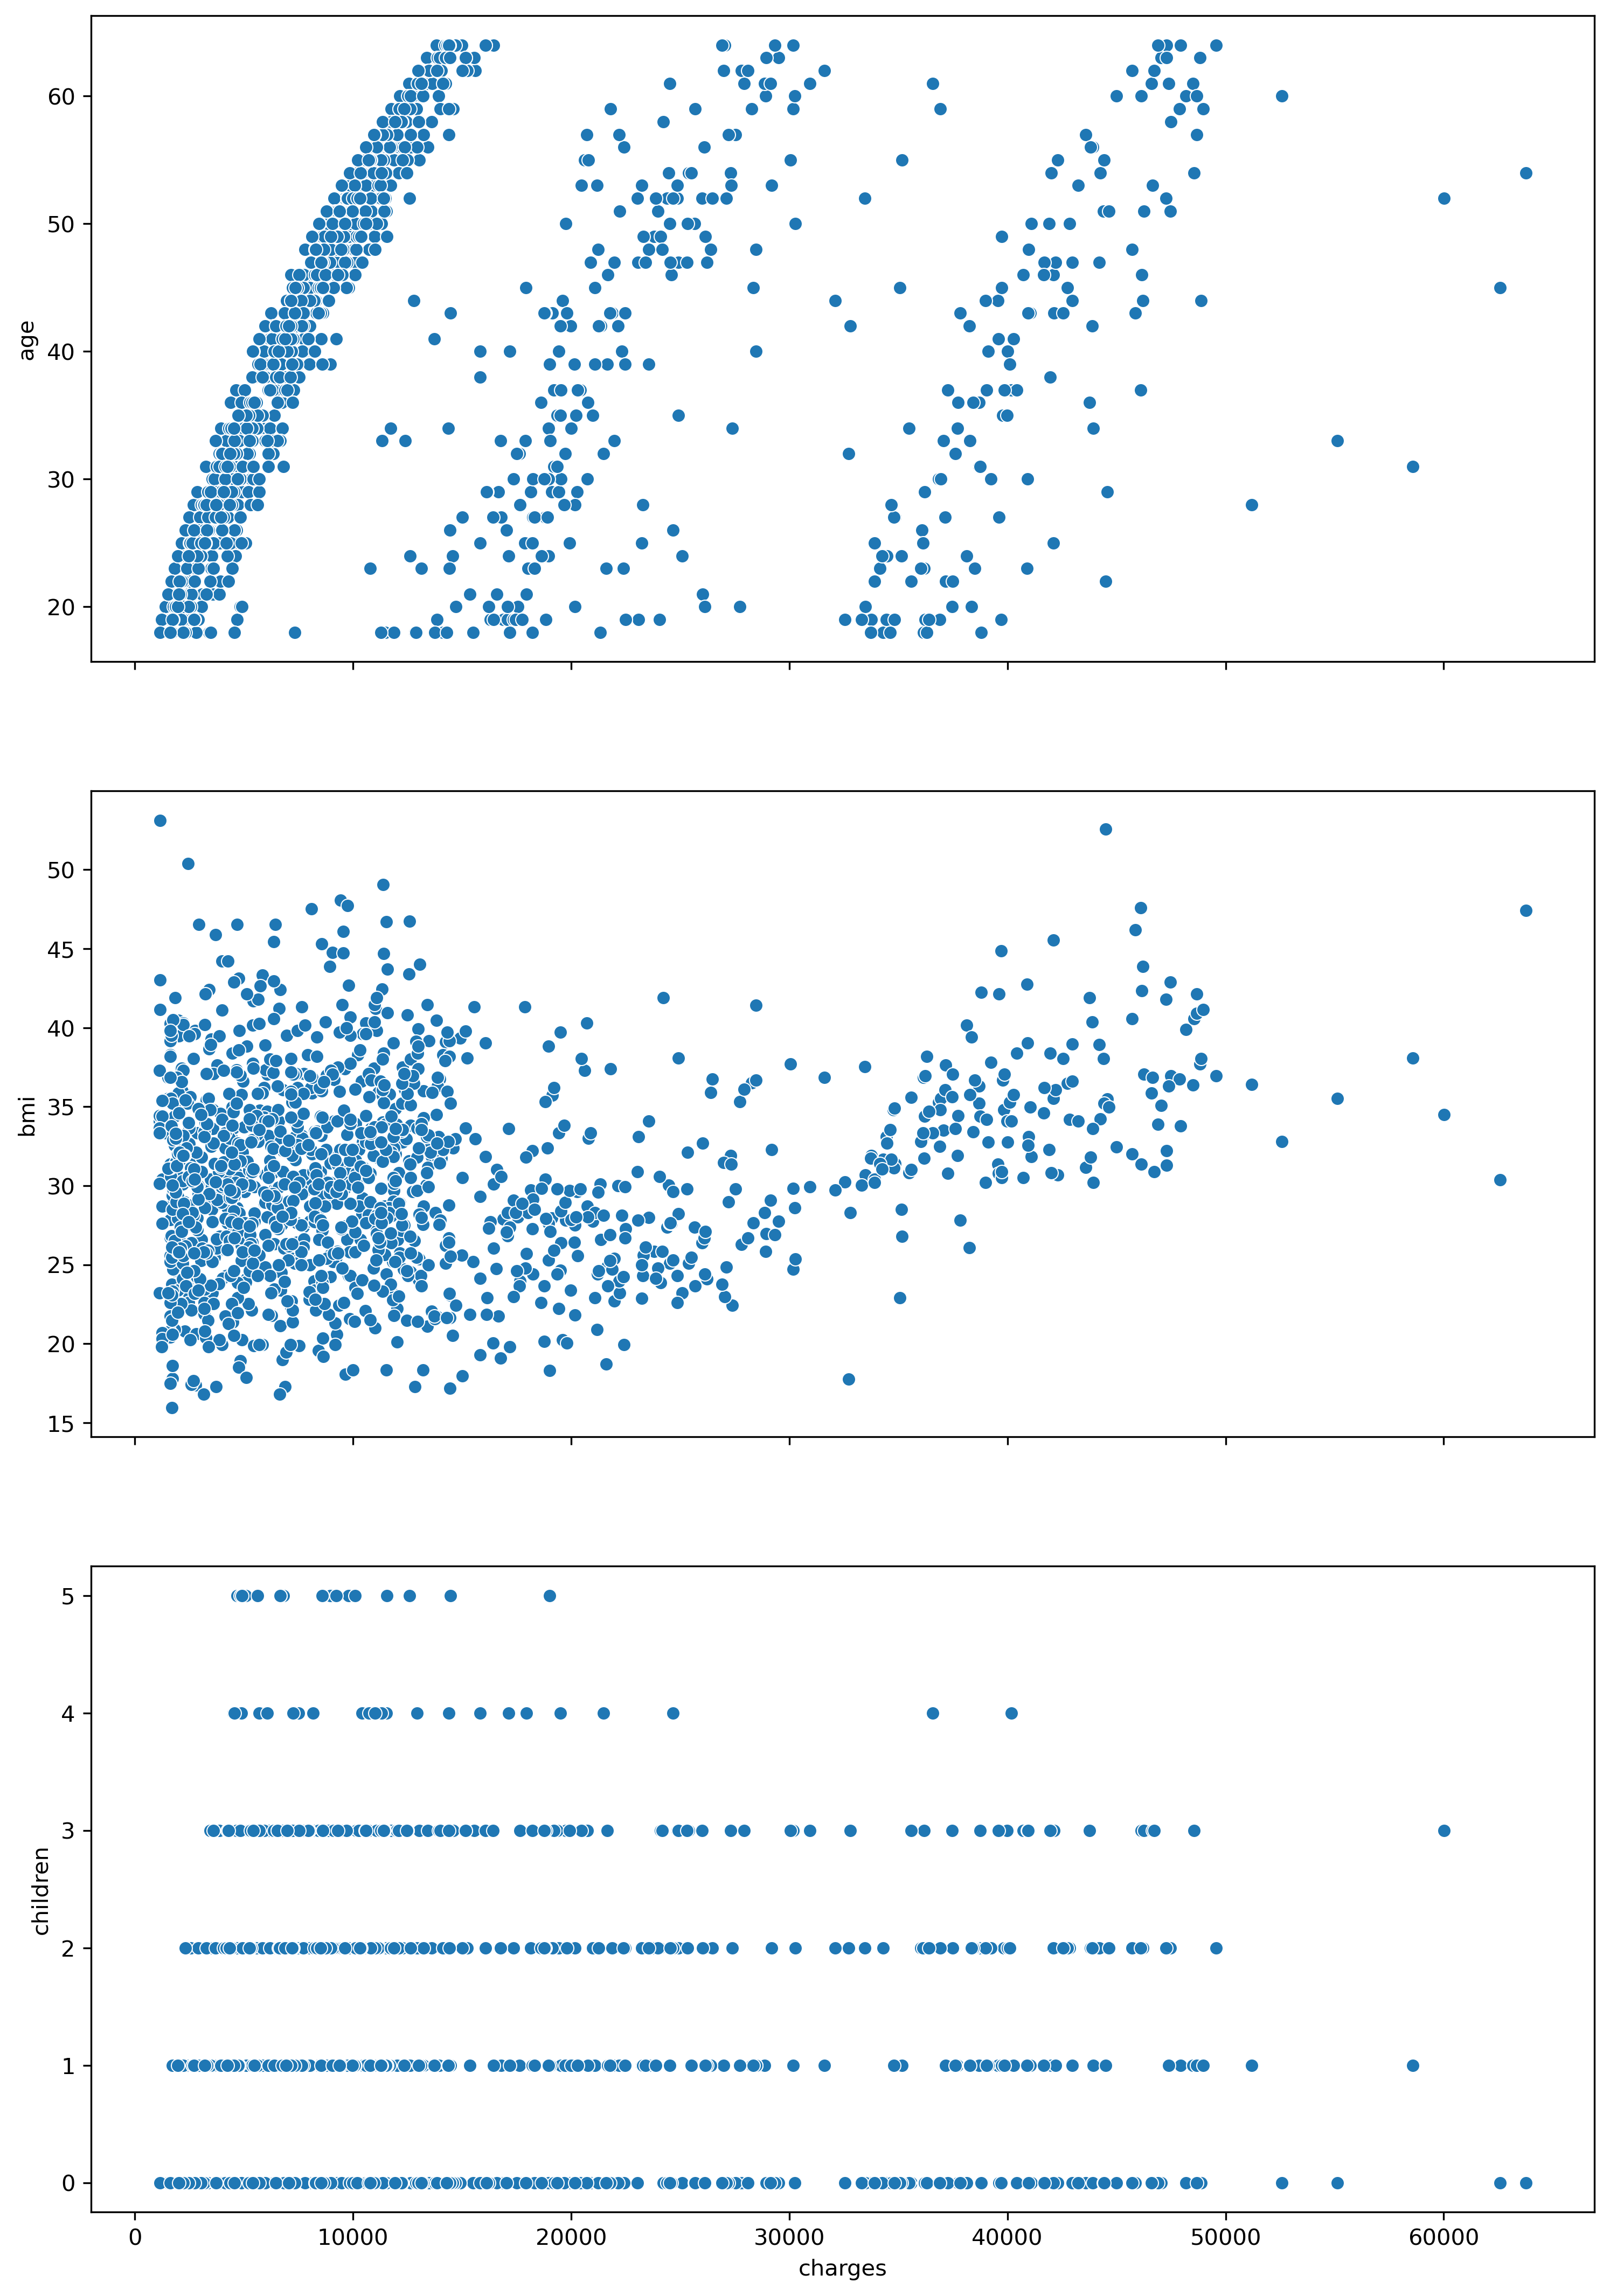